In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

df_labels = pd.read_csv('data/innovaid_hackathon_anima/output_classes.csv')

X = []
y = []
files = glob.glob("data/innovaid_hackathon_anima/input_max_positions/*.csv")
for file in files:
    df = pd.read_csv(file)
    if df.shape[0] != 50:
        continue
    df.fillna(0, inplace=True)
    df.drop("SCENE_INDEX", inplace=True, axis=1)
    X.append(df.to_numpy().flatten())
    y.append(list(df_labels[df_labels['sid'] == file.split("/")[-1].split('.')[0]]['depression_severity'])[0])

In [3]:
len(X), len(y)

(2963, 2963)

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
import numpy as np

def balance_dataset(X, y, m):
    unique_classes, class_counts = np.unique(y, return_counts=True)

    # Find the minimum count across all classes
    min_count = min(class_counts)

    # Initialize lists to store the trimmed data and labels
    X_trimmed = []
    y_trimmed = []

    for cls in unique_classes:
        # Indices of the current class
        indices = np.where(y == cls)[0]

        # Trim the indices to have exactly 'm' occurrences
        trimmed_indices = np.random.choice(indices, size=min(m, len(indices)), replace=False)

        # Append the trimmed data and labels
        X_trimmed.append(X[trimmed_indices])
        y_trimmed.append(y[trimmed_indices])

    # Concatenate the trimmed data and labels
    X_trimmed = np.concatenate(X_trimmed)
    y_trimmed = np.concatenate(y_trimmed)

    return X_trimmed, y_trimmed


(array([133., 487., 788., 878., 677.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

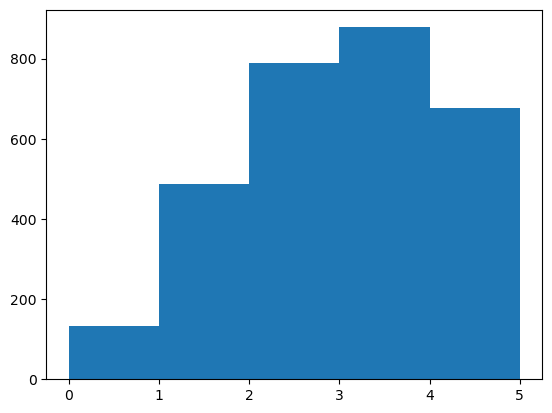

In [6]:
plt.hist(y, bins=np.arange(0, 6))

In [7]:
y = (y + np.where(y == 0, y, -1) + 1) - 1

(array([620., 788., 878., 677.,   0.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

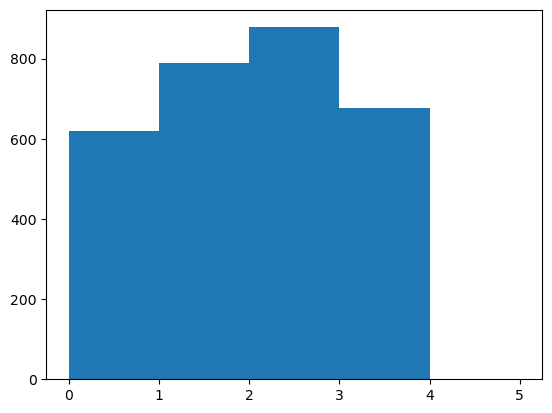

In [8]:
plt.hist(y, bins=np.arange(0, 6))

In [9]:
X, y = balance_dataset(X, y, 600)

(array([600., 600., 600., 600.,   0.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

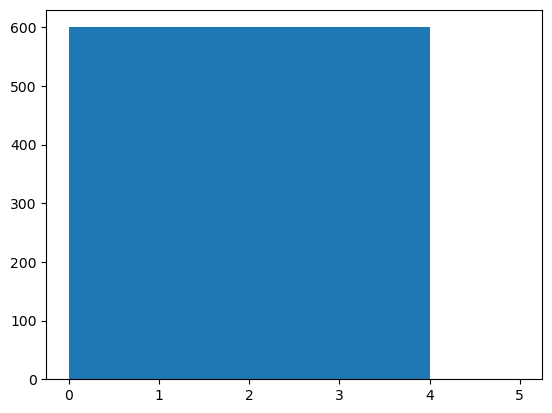

In [10]:
plt.hist(y, bins=np.arange(0, 6))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MLP Classifier

In [12]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, activation='relu', random_state=42)

model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [13]:
model.score(X_test, y_test)

0.25416666666666665

### SVM

In [14]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [15]:
model.score(X_test, y_test)

0.3020833333333333

---

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier



names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


for name, clf in zip(names, classifiers):
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f'{name}: {round(score, 5)}')

Nearest Neighbors: 0.28958
Linear SVM: 0.30625
RBF SVM: 0.24583


/Users/alorthius/anaconda3/envs/innovaid/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process: 0.26667
Decision Tree: 0.25
Random Forest: 0.25833
Neural Net: 0.29375
AdaBoost: 0.34375
Naive Bayes: 0.29167
QDA: 0.27083
